# Policy analysis
The point of this notebook is to analyze the privacy policies fetched with the spider.  
This presumes all the policies that are marked as successfully gathered in the report file are good, and only looks at said policies

In [46]:
import os
import json
import justext
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import langid

In [47]:
def site_name_from_file_name(file_name):
    return file_name[len("policy_"):len(file_name) - 4]

In [84]:
def make_policy_files():
    policy_files = []
    for filename in policy_file_names:
        policy_files.append(open(DATADIR + filename))
    return policy_files

## 1 Overview

In [48]:
DATADIR = "data/"
POLICY_FILE_PREFIX = "policy_"
REPORT_FILE_NAME = "crawl_report.json"

In [49]:
report_json = pd.read_json(DATADIR + REPORT_FILE_NAME)
report_json

,url,policy_domain,policy_url,policy_file,uses_iubenda,success
0,https://www.corriere.it/,www.corriere.it,https://www.corriere.it/privacy.shtml,policy_www.corriere.it.txt,False,True
1,https://www.wikipedia.org/,meta.wikimedia.org,https://meta.wikimedia.org/wiki/Privacy_policy,policy_www.wikipedia.org.txt,False,True
2,https://www.youtube.com/,www.youtube.com,https://www.youtube.com/t/privacy,policy_www.youtube.com.txt,False,True
3,https://www.gazzetta.it/,www.gazzetta.it,https://www.gazzetta.it/privacy.shtml,policy_www.gazzetta.it.txt,False,True
4,https://www.repubblica.it/,None,None,policy_www.repubblica.it.txt,True,False
...,...,...,...,...,...,...
79,https://www.treccani.it/,www.treccani.it,https://www.treccani.it/footer/cookies.html,policy_www.treccani.it.txt,False,True
80,https://www.iliad.it/,www.iliad.it,https://www.iliad.it/docs/informativa_privacy/...,policy_www.iliad.it.txt,False,True
81,https://www.dailyfx.com/,www.dailyfx.com,https://www.dailyfx.com/real-time-news,policy_www.dailyfx.com.txt,False,True
82,https://www.paypal.com/it/home,www.paypal.com,https://www.paypal.com/privacy-center,policy_www.paypal.com.txt,False,True


### 1.1 Success rate

In [50]:
# Recap
number_total = len(report_json)
print("Analyzed sites: " + str(number_total))

successful = report_json.loc[report_json["success"] == True]
number_successful = len(successful)
print("Successfully downloaded: " + str(number_successful))

print("Success rate: " + str(round((100 * number_successful / number_total), 1)) + "%")

failed_with_url = report_json.loc[pd.notna(report_json["policy_url"])
                                  & (report_json["success"] == False)]
print("Policy url found but no good policy found: " + str(len(failed_with_url)))
failed_with_url

Analyzed sites: 84
Successfully downloaded: 65
Success rate: 77.4%
Policy url found but no good policy found: 0


,url,policy_domain,policy_url,policy_file,uses_iubenda,success


### 1.2 Sites overview

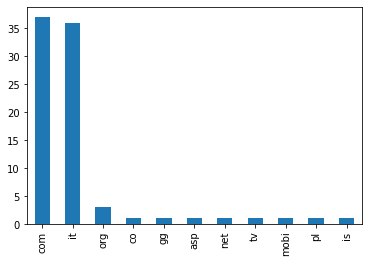

In [51]:
# TLDs

urls = report_json["url"]
ul = urls.tolist()

tlds = {}
for url in ul:
    tld = ((url.split(".")[len(url.split(".")) - 1]).split("/")[0]).split(":")[0]
    if tld in tlds.keys():
        tlds[tld] = tlds[tld] + 1
    else:
        tlds[tld] = 1
        
pd.Series(tlds).sort_values(ascending = False).plot.bar()
plt.show()

## 2 Simple analysis

In [52]:
# Open policy files
policy_file_names = successful["policy_file"].tolist()

### 2.1 Language detection

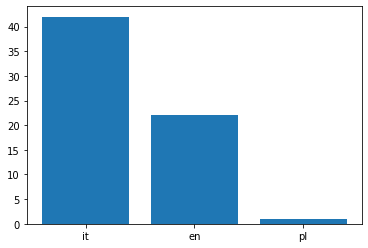

In [53]:
# Language detection
policy_files = []
for filename in policy_file_names:
    policy_files.append(open(DATADIR + filename))


languages = {}
for file in policy_files:
    languages[file.name] = langid.classify(file.read())[0]

plt.bar(pd.Series(languages).value_counts().keys(), pd.Series(languages).value_counts())
plt.show()

### 2.2 Wordcounts

it
42 total policies


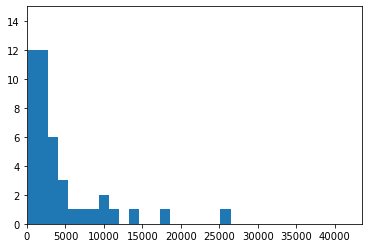

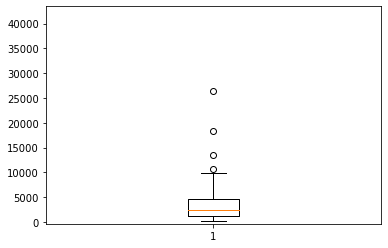

en
22 total policies


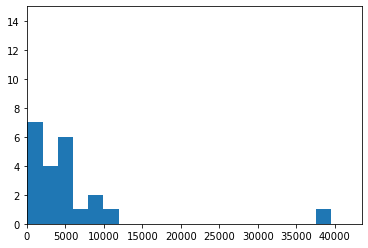

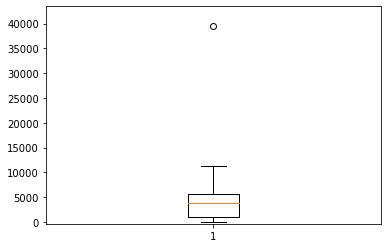

pl
1 total policies
Sample size for pl too small


In [54]:
# Simple analysis i.e. wordcount

policy_files = []
for filename in policy_file_names:
    policy_files.append(open(DATADIR + filename))

highest_wordcount = 0
for file in policy_files:
    file_wordcount = len(file.read().split())
    if file_wordcount > highest_wordcount:
        highest_wordcount = file_wordcount

    
for language in pd.Series(languages).value_counts().keys():
    policy_files = []
    for filename in languages.keys():
        if languages[filename] == language:
            filename = filename[len("data/"):]
            policy_files.append(open(DATADIR + filename))
    
    print(language)
    total_policies_current_language = len(policy_files)
    print(str(total_policies_current_language) + " total policies")
    if total_policies_current_language < 10: # Ignore small sample sizes
        print("Sample size for " + language + " too small")
        continue
    
    wordcounts = []
    for file in policy_files:
        wordcounts.append(len(file.read().split()))

    plt.ylim(0, 15)
    plt.xlim(0, highest_wordcount * 1.1)
    plt.hist(wordcounts, 20)
    plt.show()
    
    plt.ylim(-(highest_wordcount / 100), highest_wordcount * 1.1)
    plt.boxplot(wordcounts)
    plt.show()

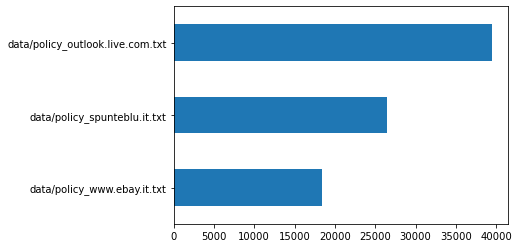

In [55]:
# Top 3 longest policies by wordcount overall

policy_files = []
for filename in policy_file_names:
    policy_files.append(open(DATADIR + filename))

wc_dict = {}

for file in policy_files:
    wc_dict[file.name] = len(file.read().split())
    
wc_s = pd.Series(wc_dict).sort_values(ascending=True)
wc_s[len(wc_s) - 3:].plot.barh()
plt.show()

In [56]:
wc_s[len(wc_s) - 3:]

data/policy_www.ebay.it.txt         18406
data/policy_spunteblu.it.txt        26444
data/policy_outlook.live.com.txt    39529
dtype: int64

### 2.3 Wordclouds

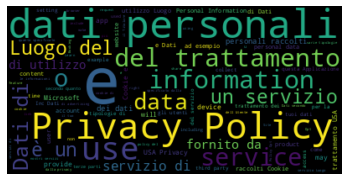

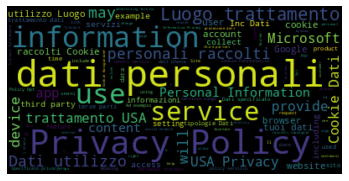

In [23]:
# Some fun wordclouds :)
policy_files = []
for filename in policy_file_names:
    policy_files.append(open(DATADIR + filename))

all_policy_text = ""
for file in policy_files:
    all_policy_text += file.read()

wordcloud = WordCloud().generate(all_policy_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Unsurprisingly you have to filter out heaps of words...
policy_files = []
for filename in policy_file_names:
    policy_files.append(open(DATADIR + filename))

all_policy_text_filtered = ""
for file in policy_files:
    for word in file.read().split():
        if word not in (justext.get_stoplist("Italian")):
            all_policy_text_filtered += word + " "

wordcloud = WordCloud().generate(all_policy_text_filtered)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2.4 Emotion analysis

In [11]:
# Text2Emotion
import text2emotion as t2e
import emoji
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/user/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
emotions_dict = {
    "Angry" : 0,
    "Fear" : 0,
    "Happy" : 0,
    "Sad" : 0,
    "Surprise" : 0
}

In [18]:
policy_files = []
for filename in policy_file_names:
    policy_files.append(open(DATADIR + filename))

In [19]:
for file in policy_files:
    emotions = t2e.get_emotion(file.read())
    top_emotion = max(emotions)
    emotions_dict[top_emotion] = emotions_dict[top_emotion] + 1

emotions_dict

{'Angry': 0, 'Fear': 0, 'Happy': 0, 'Sad': 0, 'Surprise': 65}

In [21]:
emotions_dict = {
    "Angry" : 0,
    "Fear" : 0,
    "Happy" : 0,
    "Sad" : 0,
    "Surprise" : 0
}

policy_files = []
for filename in policy_file_names:
    policy_files.append(open(DATADIR + filename))

for file in policy_files:
    emotions = t2e.get_emotion(file.read())
    for emotion in emotions:
        emotions_dict[emotion] = emotions_dict[emotion] + emotions[emotion] # maybe normalize?

emotions_dict

{'Angry': 1.7400000000000007,
 'Fear': 40.48000000000001,
 'Happy': 7.440000000000001,
 'Sad': 10.629999999999995,
 'Surprise': 4.679999999999999}

In [22]:
for e in emotions_dict.keys():
    emotions_dict[e] = round(emotions_dict[e] / len(policy_files), 3)

emotions_dict

{'Angry': 0.027,
 'Fear': 0.623,
 'Happy': 0.114,
 'Sad': 0.164,
 'Surprise': 0.072}

### 2.5 Text clustering

In [6]:
policy_files = []
for filename in policy_file_names:
    policy_files.append(open(DATADIR + filename))

policy_texts = []

for file in policy_files:
    policy_texts.append(file.read())

df = pd.DataFrame(data = policy_texts, columns = ["Text"])
df

,Text
0,desktop includes2013/SSI/notification/global.j...
1,"Privacy policy From Meta, a Wikimedia project ..."
2,Privacy e termini Accedi Introduzione Norme su...
3,desktop //js2.gazzettaobjects.it//notifiche/gl...
4,Skip to main content Privacy Policy Twitter Pr...
...,...
60,Istituto Chi Siamo La nostra storia Magazine A...
61,Highlight AllMatch Case Match DiacriticsWhole ...
62,Skip to Content News & Analysis at your finger...
63,You need to enable JavaScript to run this app....


In [7]:
# There should be a separation based on the policy's language

from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words = "english", ngram_range = (1, 3))
vec.fit(df.Text.values)
features = vec.transform(df.Text.values)

In [8]:
from sklearn.cluster import MiniBatchKMeans, KMeans
clust = KMeans(init = "k-means++", n_clusters = 2, n_init = 10)

clust.fit(features)
yhat = clust.predict(features)
df['Cluster Labels'] = clust.labels_

# df.loc[df["Cluster Labels"] == 1]

In [25]:
df_similar = pd.DataFrame(df.loc[df["Cluster Labels"] == 1].values)
# df_similar

In [26]:
df_dissimilar = pd.DataFrame(df.loc[df["Cluster Labels"] == 0].values)
# df_dissimilar

In [73]:
langs = pd.Series(languages).unique()

for lang in langs:
    print(lang)

it
en
pl


In [96]:
for lang in langs:
    language = ""
    
    if lang == "it":
        language = "italian"
    elif lang == "en":
        language = "english"
    else:
        break
        
    print("Current language: " + lang)

    texts_in_lang = []
    
    for file in make_policy_files():
        file_text = file.read()
        file_lang = langid.classify(file_text)[0]
        if file_lang == lang:
            texts_in_lang.append(file_text)
    
    df_texts_in_lang = pd.DataFrame(data = texts_in_lang, columns = ["Text"])
    
    
    from sklearn.decomposition import TruncatedSVD
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import Normalizer

    lsa = make_pipeline(TruncatedSVD(n_components=100), Normalizer(copy=False))


    vectorizer = TfidfVectorizer(
        max_df=0.5,
        min_df=5,
        stop_words="english",
    )

    try:
        X_tfidf = vectorizer.fit_transform(df_texts_in_lang.Text)
    except ValueError:
        continue
    
    X_lsa = lsa.fit_transform(X_tfidf)
    explained_variance = lsa[0].explained_variance_ratio_.sum()


    kmeans = KMeans(
        n_clusters=2,
        max_iter=100,
        n_init=1,
    )

    kmeans.fit(X_lsa)

    original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()

    for i in range(2):
        print(f"Cluster {i}: ", end="")
        for ind in order_centroids[i, :10]:
            print(f"{terms[ind]} ", end="")
        print()

Current language: it
Cluster 0: 03 11 nostri https interessato com 17 profilazione meteo cookies 
Cluster 1: luogo amazon tracciamento fornito tecnologie annunci applicazione advertising mesi sessione 
Current language: en
Cluster 0: google customer size media file analytics http action social eea 
Cluster 1: twitter manage english register money regulators emails gdpr payment recovery 


#### 2.5.2 Finer Clustering

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(features)

def getind(c):
    return df[df.Text == c].index.tolist()

def gettext(i):
    return df[df.index == i].Text.tolist()

In [12]:
similar = list(enumerate(cosine_sim[0]))
# similar

In [13]:
# This one kinda does the same thing as the 2 clusters

sim_list = []
unsim_list = []
for m in similar:
    t = gettext(m[0])
    if m[1] > 0.15:
        sim_list.append(t)
    else:
        unsim_list.append(t)

In [14]:
df_sim = pd.DataFrame(sim_list, columns = ["Text"])
df_unsim = pd.DataFrame(unsim_list, columns = ["Text"])

In [15]:
# df_sim

In [16]:
# df_unsim

In [17]:
cosim = list(enumerate(cosine_sim))
cumulative_sim = []

for entry in cosim:
    cumulative_sim.append(0)

for entry in cosim:
    i = 0
    for sim_value in entry[1]:
        cumulative_sim[i] = cumulative_sim[i] + (sim_value / len(cosim)) # Normalization
        
        i = i + 1

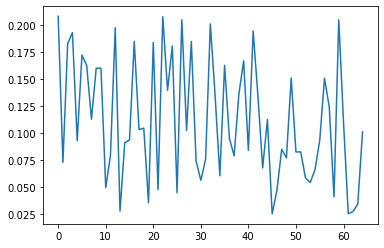

In [18]:
plt.plot(cumulative_sim)

In [19]:
sim_list = []
unsim_list = []

threshold = 0.085

i = 0
for k in cumulative_sim:
    t = gettext(i)
    if k > threshold:
        sim_list.append(t)
    else:
        unsim_list.append(t)
    i = i + 1

In [20]:
df_sim = pd.DataFrame(sim_list, columns = ["Text"])
df_unsim = pd.DataFrame(unsim_list, columns = ["Text"])

In [21]:
# df_sim

In [22]:
# df_unsim

In [23]:
verysim_list = []

threshold = 0.185

i = 0
for k in cumulative_sim:
    t = gettext(i)
    if k > threshold:
        verysim_list.append(t)
#     else:
#         unsim_list.append(t)
    i = i + 1

In [24]:
df_verysim = pd.DataFrame(verysim_list, columns = ["Text"])
df_verysim

,Text
0,desktop includes2013/SSI/notification/global.j...
1,desktop //js2.gazzettaobjects.it//notifiche/gl...
2,Passa al contenuto principaleAssistenza per ac...
3,Fantacalcio Serie A TIM Leghe Fantacalcio Seri...
4,Privacy Policy di www.fanpage.it Questa Applic...
5,Passa al contenuto principale Servizio clienti...
6,Immobiliare.it Gratis per Android Scarica Pubb...
7,x AutoMoto Motorsport Live Calendari Risultati...
